<a href="https://colab.research.google.com/github/tpezzin/mpca-rp/blob/main/ArvoreDecisaoAlteracaoHeuristica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data[:,2:], iris.target

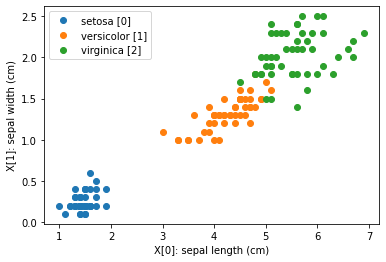

In [2]:
import matplotlib.pyplot as plt

for k in set(y):
  plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', label=f"{iris.target_names[k]} [{k}]")
plt.legend()
plt.xlabel(f"X[0]: {iris.feature_names[0]}")
plt.ylabel(f"X[1]: {iris.feature_names[1]}")
plt.show()

In [3]:
from collections import Counter
from sklearn.metrics import accuracy_score
import numpy as np

def maisFrequente(y):
  return Counter(y.flat).most_common(1)[0][0]

class ZeroR():
  def fit(self, X, y):
    self.resposta = maisFrequente(y)
  def predict(self, X):
    y = np.empty((X.shape[0]))
    y[:] = self.resposta
    return y

modelo = ZeroR()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (y == ypred)

(0.3333333333333333,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class Arvore(BaseEstimator, ClassifierMixin):
  def __init__(self):
    self.caracteristica = 0

  def fit(self, X, y):
    self.valor = np.mean(X[:,self.caracteristica])
    maiores = X[:,self.caracteristica] > self.valor
    if sum(maiores)>0 and sum(~maiores)>0:
      self.maiores = Arvore()
      self.maiores.fit(X[maiores,:], y[maiores])
      self.menores = Arvore()
      self.menores.fit(X[~maiores,:], y[~maiores])
    else:
      self.resposta = maisFrequente(y)

  def predict(self, X):
    y = np.empty((X.shape[0]))
    if hasattr(self, "resposta"):
      y[:] = self.resposta
    else:
      maiores = X[:,self.caracteristica] > self.valor
      y[maiores] = self.maiores.predict(X[maiores,:])
      y[~maiores] = self.menores.predict(X[~maiores,:])
    return y

modelo = Arvore()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.9533333333333334,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,

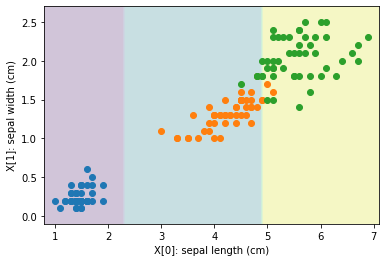

In [5]:
import matplotlib.pyplot as plt

def plotDecisao(modelo, X, y):
    modelo.fit(X, y)
    x0s = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 100)
    x1s = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xdec = np.c_[x0.ravel(), x1.ravel()]
    ypred = modelo.predict(Xdec)
    plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.25)
    for k in set(y):
        plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', label=f"{iris.target_names[k]} [{k}]")
    plt.xlabel(f"X[0]: {iris.feature_names[0]}")
    plt.ylabel(f"X[1]: {iris.feature_names[1]}")
    plt.show()

plotDecisao(Arvore(), X, y)

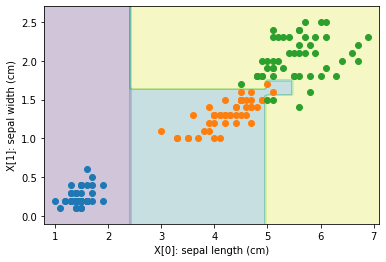

In [6]:
from sklearn.tree import DecisionTreeClassifier
plotDecisao(DecisionTreeClassifier(), X, y)

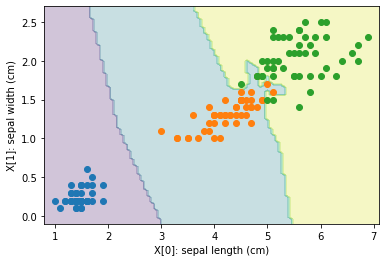

In [7]:
from sklearn.neighbors import KNeighborsClassifier
plotDecisao(KNeighborsClassifier(1), X, y)

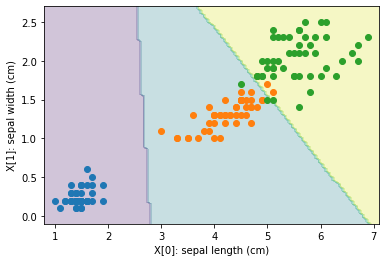

In [8]:
from sklearn.linear_model import LogisticRegression
plotDecisao(LogisticRegression(), X, y)

In [9]:
def impureza(y): #Gini
  labels = list(set(y))
  labels.sort()
  probabilidades = np.zeros((len(labels),))
  for i,k in enumerate(labels):
    probabilidades[i] = sum(y==k)/len(y)
  result = 1 - sum(probabilidades**2)
  return result

ytmp = y[:]
valor = impureza(ytmp)
valor

0.6666666666666667

In [10]:
def impurezaValor(x, y, valor):
  maiores = x > valor
  impurezaMaiores = impureza(y[maiores])
  propMaiores = sum(maiores)/len(y)
  impurezaMenores = impureza(y[~maiores])
  propMenores = sum(~maiores)/len(y)
  impurezaTotal = propMaiores*impurezaMaiores + propMenores*impurezaMenores
  return impurezaTotal, impurezaMaiores, impurezaMenores

impurezaValor(X[:,0], y, 2.5)

(0.3333333333333333, 0.5, 0.0)

In [11]:
def melhorValor(x, y):
  result = None
  menorImpureza = float('inf')
  xmax = np.max(x)
  xmin = np.min(x)
  while True:
    valor = (xmin+xmax)/2
    impTotal, impMaiores, impMenores = impurezaValor(x, y, valor)
    if impTotal < menorImpureza:
      menorImpureza = impTotal
      result = valor
      if impMaiores == 0 or impMenores == 0:
        break
      if impMaiores < impMenores:
        xmin = valor
      else:
        xmax = valor
    else:
      break
  return result, menorImpureza

melhorValor(X[:,0], y)

(2.475, 0.3333333333333333)

In [12]:
def melhorCaracteristica(X, y):
  impurezas = []
  valores = []
  for caracteristica in range(X.shape[1]):
    valor, imp = melhorValor(X[:,caracteristica], y)
    impurezas.append(imp)
    valores.append(valor)
  impurezas = np.array(impurezas)
  caracteristica = np.argmin(impurezas)
  return caracteristica, valores[caracteristica], impurezas[caracteristica]

melhorCaracteristica(X, y)

(0, 2.475, 0.3333333333333333)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class Arvore(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.caracteristica, self.valor, self.imp = melhorCaracteristica(X, y)
    maiores = X[:,self.caracteristica] > self.valor
    if sum(maiores)>0 and sum(~maiores)>0:
      self.maiores = Arvore()
      self.maiores.fit(X[maiores,:], y[maiores])
      self.menores = Arvore()
      self.menores.fit(X[~maiores,:], y[~maiores])
    else:
      self.resposta = maisFrequente(y)

  def predict(self, X):
    y = np.empty((X.shape[0]))
    if hasattr(self, "resposta"):
      y[:] = self.resposta
    else:
      maiores = X[:,self.caracteristica] > self.valor
      y[maiores] = self.maiores.predict(X[maiores,:])
      y[~maiores] = self.menores.predict(X[~maiores,:])
    return y

modelo = Arvore()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.9933333333333333,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,

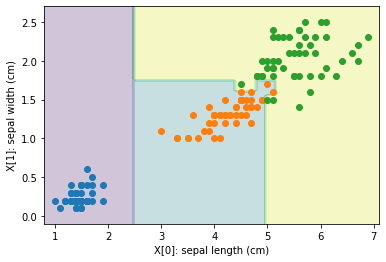

In [14]:
plotDecisao(Arvore(), X, y)

In [15]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Arvore(), X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ]),
 0.9533333333333334)

# Alteração na heurística para encontrar a melhor característica. 

In [16]:
import random

def melhorValor2(x, y):
  result = None
  menorImpureza = float('inf')
  xmax = np.max(x)
  xmin = np.min(x)
  while True:
    valorMedio = (xmin+xmax)/2
    impTotalMedio, impMaioresMedio, impMenoresMedio = impurezaValor(x, y, valorMedio)

    valorAle1 = random.uniform(xmin,valorMedio)
    impTotalAle1, impMaioresAle1, impMenoresAle1 = impurezaValor(x, y, valorAle1)

    valorAle2 = random.uniform(valorMedio, xmax)
    impTotalAle2, impMaioresAle2, impMenoresAle2 = impurezaValor(x, y, valorAle2)

    if impTotalAle1 < impTotalMedio and impTotalAle1 < impTotalAle2:
        impTotal, impMaiores, impMenores = impTotalAle1, impMaioresAle1, impMenoresAle1
        valor = valorAle1
    elif impTotalMedio < impTotalAle1 and impTotalMedio < impTotalAle2:
        impTotal, impMaiores, impMenores = impTotalMedio, impMaioresMedio, impMenoresMedio
        valor = valorMedio
    else:
        impTotal, impMaiores, impMenores = impTotalAle2, impMaioresAle2, impMenoresAle2
        valor = valorAle2

    if impTotal < menorImpureza:
      menorImpureza = impTotal
      result = valor
      if impMaiores == 0 or impMenores == 0:
        break
      if impMaiores < impMenores:
        xmin = valor
      else:
        xmax = valor
    else:
      break
  return result, menorImpureza

melhorValor2(X[:,0], y)

(2.7375019146727175, 0.3333333333333333)

In [17]:
def melhorCaracteristica2(X, y):
  impurezas = []
  valores = []
  for caracteristica in range(X.shape[1]):
    valor, imp = melhorValor2(X[:,caracteristica], y)
    impurezas.append(imp)
    valores.append(valor)
  impurezas = np.array(impurezas)
  caracteristica = np.argmin(impurezas)
  return caracteristica, valores[caracteristica], impurezas[caracteristica]

melhorCaracteristica2(X, y)

(0, 2.475, 0.3333333333333333)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class Arvore2(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.caracteristica, self.valor, self.imp = melhorCaracteristica2(X, y)
    maiores = X[:,self.caracteristica] > self.valor
    if sum(maiores)>0 and sum(~maiores)>0:
      self.maiores = Arvore2()
      self.maiores.fit(X[maiores,:], y[maiores])
      self.menores = Arvore2()
      self.menores.fit(X[~maiores,:], y[~maiores])
    else:
      self.resposta = maisFrequente(y)

  def predict(self, X):
    y = np.empty((X.shape[0]))
    if hasattr(self, "resposta"):
      y[:] = self.resposta
    else:
      maiores = X[:,self.caracteristica] > self.valor
      y[maiores] = self.maiores.predict(X[maiores,:])
      y[~maiores] = self.menores.predict(X[~maiores,:])
    return y

modelo = Arvore2()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.9933333333333333,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,

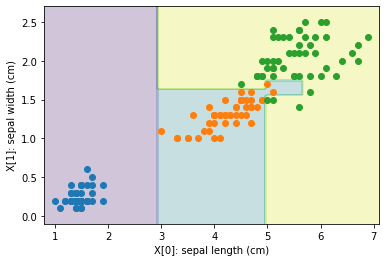

In [19]:
plotDecisao(Arvore2(), X, y)

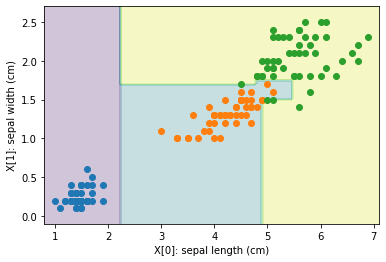

In [20]:
plotDecisao(Arvore2(), X, y)

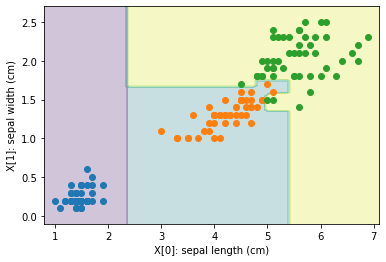

In [21]:
plotDecisao(Arvore2(), X, y)

In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Arvore2(), X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]), 0.96)

## Testando a árvore para outros datasets

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target

scores = cross_validate(Arvore2(), X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.88888889, 0.88888889, 0.86111111, 1.        , 1.        ]),
 0.9277777777777778)

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

scores = cross_validate(Arvore2(), X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.92105263, 0.9122807 , 0.97368421, 0.96491228, 0.91150442]),
 0.936686849868033)

In [60]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

scores = cross_validate(Arvore2(), X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]),
 0.9666666666666668)

In [28]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

df = pd.read_csv('/mydrive/RecPad/Aula04/heart.csv')
dataset = np.asarray(df)
X = dataset[:,:-1]
y = dataset[:,-1:].astype(int)

y = np.squeeze(np.asarray(y))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [32]:
scores = cross_validate(Arvore2(), X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.73770492, 0.81967213, 0.73770492, 0.73333333, 0.75      ]),
 0.7556830601092897)

### Interpretação dos resultados

A alteração na heurística aplica aleatoriedade nas duas metades que foram divididas pelo valor médio, buscando a menor impureza que estará ou na primeira metade ou na segunda, adiantando assim o processo de identificação do valor. A aleatoriedade fará com que os resultados de cada execução possam ser diferentes (o que não acontece com a outra heurísitica). A aleatoriedade possibilita que o limiar do nó seja mais próximo das amostras que estão nas extremidade, como pode ser visto nos plots. Enquanto a função "melhorValor" encontra o limiar próximo do local "meio" entre os rótulos, a "melhorValor2" apresenta o limiar tendendo mais ao lado de algum dos rótulos fazendo com que o resultado varie um pouco para pior (exemplo: 93%) ou para melhor (exemplo: 96,66%). Enquanto isso, o modelo Arvore apresenta o resultado fixo de 95,33% para o Iris Dataset.

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

scores = cross_validate(Arvore(), X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ]),
 0.9533333333333334)